# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
useful_data = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
useful_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
useful_data["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice=useful_data[useful_data.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicate_ID=duplicate_mice['Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data=useful_data[useful_data['Mouse ID']==duplicate_ID[0]]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=useful_data[useful_data['Mouse ID']!=duplicate_ID[0]]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_stat=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
drug_regimen_stat_summary=drug_regimen_stat.describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean=drug_regimen_stat.mean()
median=drug_regimen_stat.median()
variance=drug_regimen_stat.var()
std=drug_regimen_stat.std()
sem=drug_regimen_stat.sem()

summarry_dataframe=pd.DataFrame({
    'Mean Tumor Volume':mean,
    'Median Tumor Volume':median,
    'Tumor Volume Variance':variance,
    'Tumor Volume Std. Dev.':std,
    'Tumor Volume Std. Err.':sem
})

summarry_dataframe

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stat_agg=drug_regimen_stat.agg(['mean','median', 'var','std','sem'])
print('Tumor Volume (mm3)')
summary_stat_agg

Tumor Volume (mm3)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

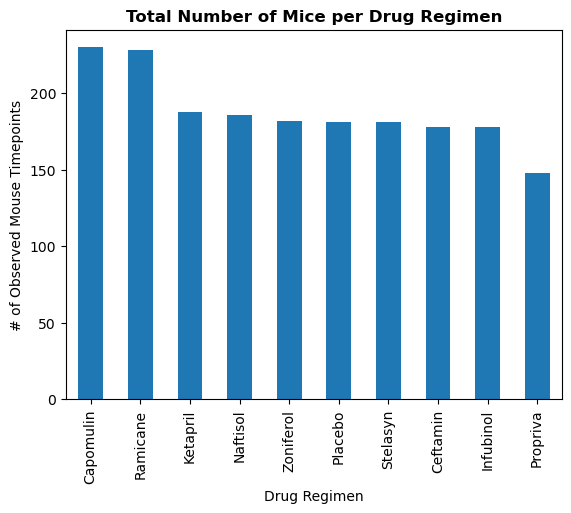

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
num_of_rows=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].count().sort_values(ascending=False)
row_drug_regime_chart=num_of_rows.plot(kind='bar')

#set both x and y labels
row_drug_regime_chart.set_title(label='Total Number of Mice per Drug Regimen', fontweight = 'bold')
row_drug_regime_chart.set_xlabel('Drug Regimen')
row_drug_regime_chart.set_ylabel('# of Observed Mouse Timepoints')

plt.show()

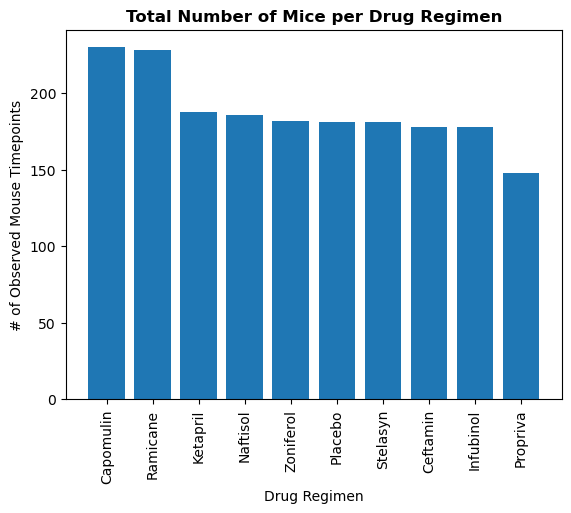

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen=num_of_rows.index.tolist()
x_axis=np.arange(len(drug_regimen))

# Create a bar chart based upon the above data
plt.bar(x_axis, num_of_rows,  align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen, rotation='vertical')

# Give the chart a title, x label, and y label
plt.title('Total Number of Mice per Drug Regimen', fontweight = 'bold')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

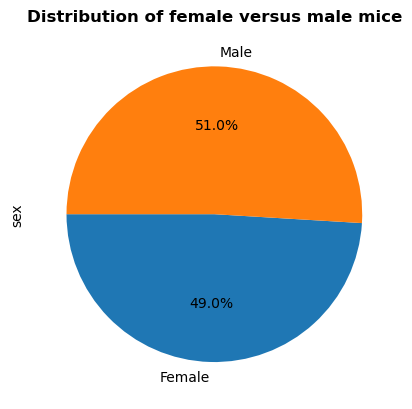

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_male_distr =clean_data.groupby('Sex')['Mouse ID'].count()
pie_plot =female_male_distr.plot(kind="pie",autopct='%1.1f%%',startangle=180)

#set both x and y labels
pie_plot.set_title(label='Distribution of female versus male mice', fontweight = 'bold')
pie_plot.set_ylabel('sex')

plt.show()

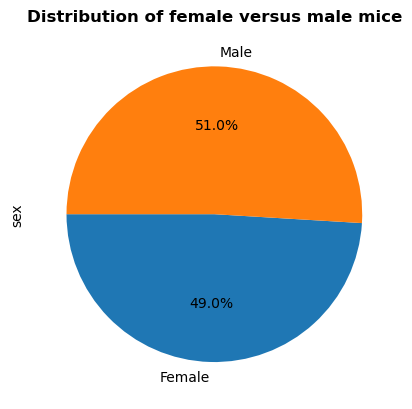

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=female_male_distr.index.tolist()

plt.pie(female_male_distr,labels=labels,autopct="%1.1f%%",startangle=180)

#set both x and y labels
plt.title(label='Distribution of female versus male mice', fontweight = 'bold')
plt.ylabel('sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_t_vol= clean_data.groupby('Mouse ID', as_index=False)[['Timepoint','Drug Regimen','Tumor Volume (mm3)']].last()
final_t_vol.reset_index()
final_t_vol
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoin

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a262,45,Placebo,70.717621
3,a275,45,Ceftamin,62.999356
4,a366,30,Stelasyn,63.440686
...,...,...,...,...
243,z435,10,Propriva,48.710661
244,z578,45,Ramicane,30.638696
245,z581,45,Infubinol,62.754451
246,z795,45,Naftisol,65.741070


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_Data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_trmt_vol=final_t_vol.loc[final_t_vol['Drug Regimen']==treatment]
    
    # add subset
    final_trmt_vol=final_trmt_vol['Tumor Volume (mm3)']
    tumor_vol_Data.append(final_trmt_vol)
  
    # Determine outliers using upper and lower bounds
    quartiles=final_trmt_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier=final_trmt_vol.loc[(final_trmt_vol<lower_bound) | (final_trmt_vol > upper_bound)]
    
    print(f"{treatment}'s IQR is {round(iqr,2)} and potential outliers: {round(outlier,2)}")

Capomulin's IQR is 7.78 and potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's IQR is 9.1 and potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's IQR is 11.48 and potential outliers: 31    36.32
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's IQR is 15.58 and potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


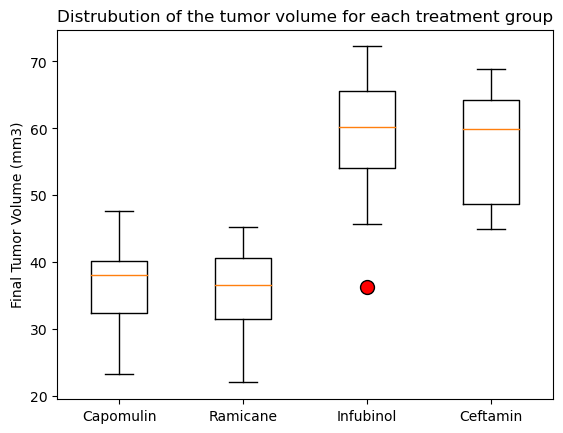

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Distrubution of the tumor volume for each treatment group')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_Data, labels=treatment_list,flierprops={'markerfacecolor':'r','markersize': 10})
plt.show()

## Line and Scatter Plots

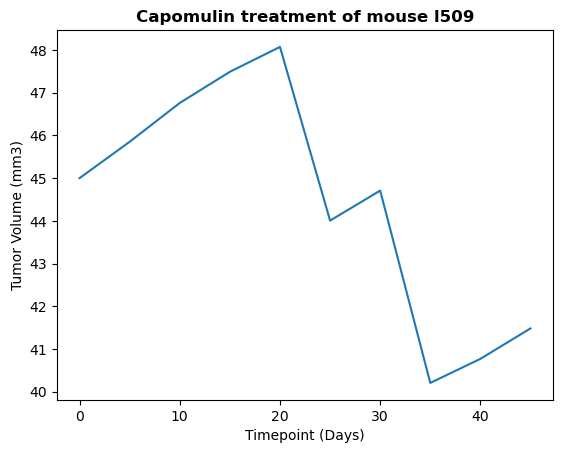

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
reduced_df=clean_data.loc[clean_data['Drug Regimen']=='Capomulin']
single_mouse_data=reduced_df.loc[reduced_df['Mouse ID']=='l509']

plt.plot(single_mouse_data['Timepoint'],single_mouse_data['Tumor Volume (mm3)'])
plt.title(f"Capomulin treatment of mouse l509", fontweight='bold')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_23588\196291403.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_reduced_df=reduced_df.groupby('Mouse ID').mean()


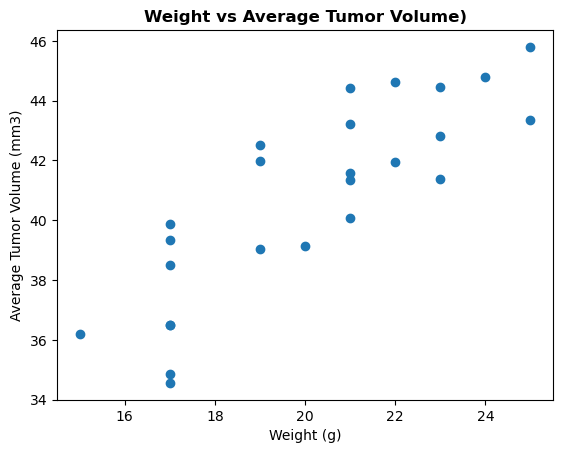

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_reduced_df=reduced_df.groupby('Mouse ID').mean()
plt.scatter(new_reduced_df['Weight (g)'],new_reduced_df['Tumor Volume (mm3)'])
plt.title('Weight vs Average Tumor Volume)', fontweight='bold')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor is 0.84


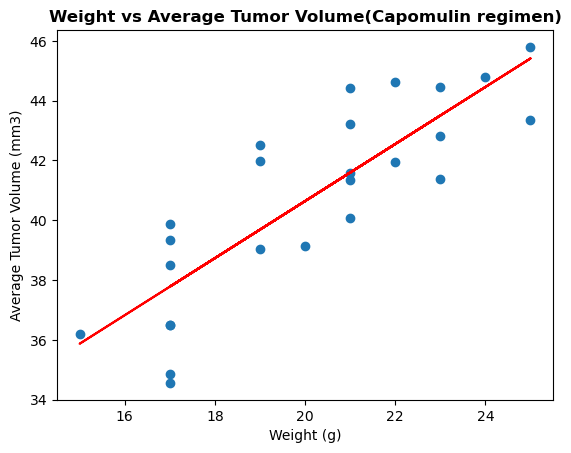

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = new_reduced_df['Weight (g)']
y_values = new_reduced_df['Tumor Volume (mm3)']


# Calculate the correlation
correlation = round(st.pearsonr(x_values,y_values)[0],2)

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')

# Plot the Annotation in the graph 
plt.annotate(line_eq,(0,50), fontsize=15, color="red")

# Define title and x/y labels
plt.title('Weight vs Average Tumor Volume(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f'The correlation between mouse weight and the average tumor is {correlation}')
plt.show()